In [ ]:
ano= 2023
caminho_dados = "/content/drive/MyDrive/ad_cursonot/2023_Viagem.csv"
caminho_saida_tabela = f'/content/drive/MyDrive/ad_cursonot/output/tabela_{ano}.xlsx'
caminho_saida_grafico = f'/content/drive/MyDrive/ad_cursonot/output/grafico_{ano}.png'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
#Lendo os dados
df_viagens = pd.read_csv(caminho_dados, encoding="Windows-1252", sep=";")


In [ ]:
colunas_de_valor = ['Valor diárias', 'Valor passagens', 'Valor outros gastos']

In [ ]:
for coluna in colunas_de_valor:
    df_viagens[coluna] = (
        df_viagens[coluna]
        .astype(str)
        .str.replace('.', '', regex=False)
        .str.replace(',', '.', regex=False)
        .str.replace(r'[^\d.]', '', regex=True)
    )
    df_viagens[coluna] = pd.to_numeric(df_viagens[coluna], errors='coerce')

In [ ]:
df_viagens[coluna] = pd.to_numeric(df_viagens[coluna], errors='coerce')

In [ ]:
 # criando nova coluna de despesas
df_viagens['Despesas']= df_viagens ['Valor diárias'] + df_viagens['Valor passagens'] + df_viagens['Valor outros gastos']

In [ ]:
df_viagens['Despesas'] = df_viagens[colunas_de_valor].sum(axis=1).fillna(0)

In [ ]:
print(df_viagens['Despesas'].dtype)
df_viagens['Despesas'] = pd.to_numeric(df_viagens['Despesas'], errors='coerce')

float64


In [ ]:
df_viagens

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas
0,17821923,000001/23-1C,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26352,Fundação Universidade Federal do ABC,***.875.238-**,PRISCILA LEAL DA SILVA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,01/01/2023,02/12/2023,Loughborough/Reino Unido,Intercâmbio acadêmico PCDP anterior 07/21-3C,0.00,0.00,"0,00",0.00,0.00
1,18159396,000001/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.000.000-**,Ekaterina Pavlovskaia,NaN,-1,Sem informação,25/02/2023,06/03/2023,Pirenópolis/GO,Segue abaixo cópia da carta-convite enviada à ...,0.00,7894.50,"0,00",0.00,7894.50
2,18236583,000018/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26236,Universidade Federal Fluminense,NaN,CAMILLA DUARTE DA SILVA,BIBLIOTECARIO-DOCUMENTALISTA,-1,Sem informação,16/01/2023,28/02/2024,Rio de Janeiro/RJ,Afastamento para pós-graduação stricto sensu n...,0.00,0.00,"0,00",0.00,0.00
3,18288418,000007/23-1C,Realizada,SIM,Por necessidade do serviço.,52000,Ministério da Defesa,52121,Comando do Exército,***.621.358-**,ANDRE LUIS COSTA PITANGUEIRA,NaN,OfSuperior,OfSuperior,10/01/2023,29/01/2023,Nova York/Estados Unidos da América,Participar da revisão do COE Manual (Contingen...,39565.70,7434.13,"0,00",1095.35,48095.18
4,18296348,000070/23,Realizada,SIM,A efetivação do empenho no Siafi e a respectiv...,26000,Ministério da Educação,26406,"Instituto Federal de Educação, Ciência e Tecno...",***.407.547-**,LIDIANY MIRANDA FERRAZ NUNES,AUXILIAR DE BIBLIIOTECA,-1,Sem informação,05/02/2023,10/02/2023,Vitória/ES,Participação das aulas de Mestrado Interinstit...,1013.96,0.00,"0,00",0.00,1013.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832232,2023001618,Sem informaçã,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.748.269-**,BIANCA VIANA CARDOSO KIVEL,ANALISTA DO BANCO CENTRAL,-1,Sem informação,05/12/2023,06/12/2023,Sem informação,Participar de tratativas nos locais das reuniõ...,606.89,3331.29,"0,00",0.00,3938.18
832233,2023001619,Sem informaçã,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.231.806-**,LUCAS ALVES FREIRE,PROCURADOR DO BANCO CENTRAL,-1,Sem informação,11/12/2023,13/12/2023,Sem informação,Participar da reunião do COPOM .,1089.00,1837.18,"0,00",0.00,2926.18
832234,2023001628,Sem informaçã,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.632.011-**,SERGIO BOTELHO,TECNICO DO BANCO CENTRAL,-1,Sem informação,07/12/2023,08/12/2023,Sem informação,Acompanhamento do Presidente do BC - São Paulo,734.13,4555.95,"0,00",0.00,5290.08
832235,2023001631,Sem informaçã,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.407.445-**,NELSON CAMPOS REIS JUNIOR,TECNICO DO BANCO CENTRAL,-1,Sem informação,11/12/2023,11/12/2023,Sem informação,Acompanhamento do Presidente - São Paulo.,319.28,3745.53,"0,00",400.00,4464.81


In [ ]:
#ajustando valores nulos na coluna de cargo
df_viagens['Cargo'] = df_viagens['Cargo'].fillna('Não identificado')



In [ ]:
#convertendo colunas de datas
df_viagens['Período - Data de início']= pd.to_datetime(df_viagens['Período - Data de início'], format='%d/%m/%Y')
df_viagens['Período - Data de fim'] = pd.to_datetime(df_viagens['Período - Data de fim'], format='%d/%m/%Y')

#Criando novas colunas de data
df_viagens['Mês da viagem']= df_viagens['Período - Data de início'].dt.month_name()
df_viagens['Dias de viagem']= (df_viagens['Período - Data de fim'] - df_viagens['Período - Data de início']).dt.days



In [ ]:
print(df_viagens.columns.tolist())

['Identificador do processo de viagem', 'Número da Proposta (PCDP)', 'Situação', 'Viagem Urgente', 'Justificativa Urgência Viagem', 'Código do órgão superior', 'Nome do órgão superior', 'Código órgão solicitante', 'Nome órgão solicitante', 'CPF viajante', 'Nome', 'Cargo', 'Função', 'Descrição Função', 'Período - Data de início', 'Período - Data de fim', 'Destinos', 'Motivo', 'Valor diárias', 'Valor passagens', 'Valor devolução', 'Valor outros gastos', 'Despesas', 'Mês da viagem', 'Dias de viagem']


In [ ]:
    df_viagens_consolidado = (df_viagens
    .groupby('Cargo')
    .agg(
        despesa_media=('Despesas', 'mean'),
        duracao_média=('Dias de viagem', 'mean'),
        despesas_totais=('Despesas', 'sum'),
        destino_mais_frequente=('Destinos', pd.Series.mode),
        n_viagens=('Nome', 'count')
        )
    .reset_index()
    .sort_values(by='despesas_totais', ascending=False))

In [ ]:
#Filtrando tabela consolidad por cargos relevantes (> 1% das viagens)
df_cargos = df_viagens['Cargo'].value_counts(normalize=True).reset_index()
cargos_relevantes = df_cargos.loc[df_cargos['proportion'] > 0.01, 'Cargo']
filtro = df_viagens_consolidado['Cargo'].isin(cargos_relevantes)


In [ ]:
df_final = df_viagens_consolidado[filtro].sort_values(by='n_viagens', ascending=False)

In [ ]:
df_final.to_excel(caminho_saida_tabela, index=False)

In [ ]:
df_viagens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832237 entries, 0 to 832236
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Identificador do processo de viagem  832237 non-null  int64         
 1   Número da Proposta (PCDP)            832237 non-null  object        
 2   Situação                             832237 non-null  object        
 3   Viagem Urgente                       832237 non-null  object        
 4   Justificativa Urgência Viagem        832135 non-null  object        
 5   Código do órgão superior             832237 non-null  int64         
 6   Nome do órgão superior               832237 non-null  object        
 7   Código órgão solicitante             832237 non-null  int64         
 8   Nome órgão solicitante               832237 non-null  object        
 9   CPF viajante                         749975 non-null  object        
 

In [ ]:
print(df_final['despesa_media'].count)

<bound method Series.count of 495   3262.87
444   3181.10
570   2031.03
571   1404.92
316    984.45
209   1466.41
72    2596.75
179   1295.80
778   1457.08
688   4306.27
210   2417.95
113   1747.24
Name: despesa_media, dtype: float64>


In [ ]:
df_viagens_consolidado = (df_viagens
.groupby('Cargo')
.agg(
    despesa_media=('Despesas', 'mean'),
    duracao_média=('Dias de viagem', 'mean'),
    despesas_totais=('Despesas', 'sum'),
    destino_mais_frequente=('Destinos', pd.Series.mode),
    n_viagens=('Nome', 'count')
    )
.reset_index()
.sort_values(by='despesas_totais', ascending=False))

In [ ]:
#Filtrando tabela consolidado por cargos relevantes (> 1% das viagens)
df_cargos = df_viagens['Cargo'].value_counts(normalize=True).reset_index()
cargos_relevantes = df_cargos.loc[df_cargos['proportion'] > 0.01, 'Cargo']
filtro = df_viagens_consolidado['Cargo'].isin(cargos_relevantes)

In [ ]:
df_final = df_viagens_consolidado[filtro].sort_values(by='n_viagens', ascending=False)

In [ ]:
df_final.to_excel(caminho_saida_tabela, index=False)

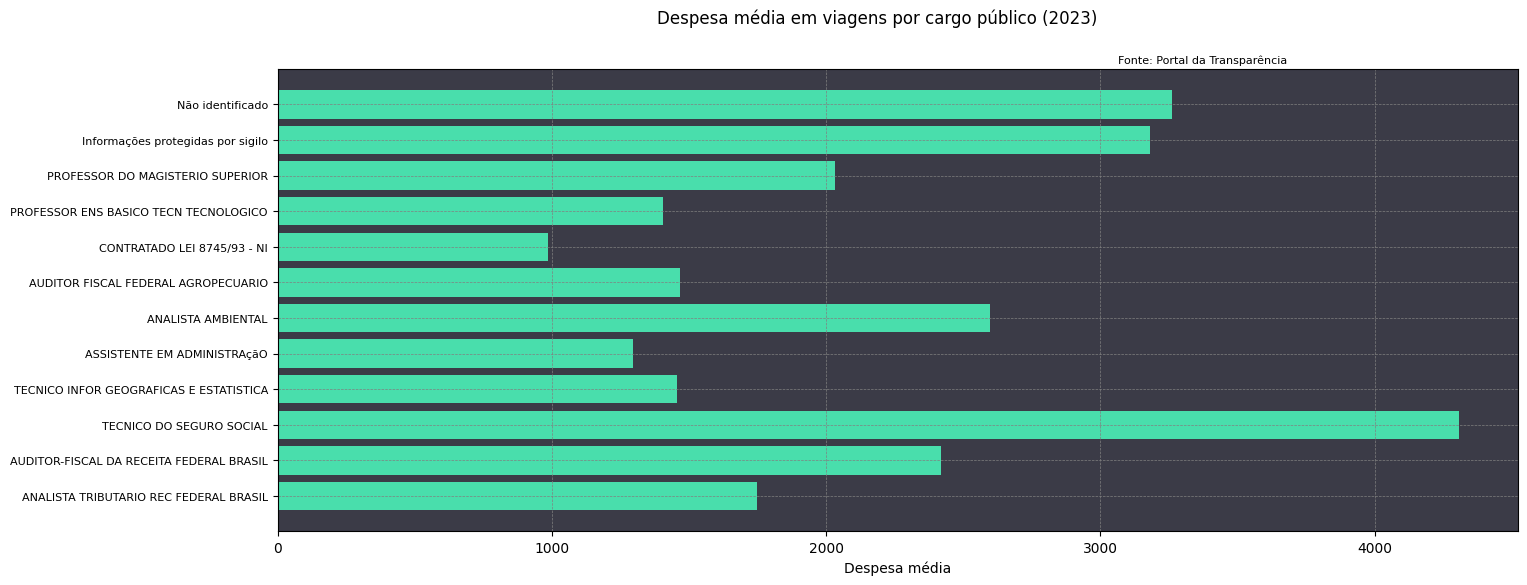

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.barh(df_final['Cargo'], df_final['despesa_media'], color='#49deac')
ax.invert_yaxis()


ax.set_facecolor('#3b3b47')
fig.suptitle('Despesa média em viagens por cargo público (2023)')
plt.figtext(0.65, 0.89, 'Fonte: Portal da Transparência', fontsize=8)
plt.grid(color='gray', linestyle= '--', linewidth=0.5)
plt.yticks(fontsize=8)
plt.xlabel('Despesa média')
plt.show()

In [ ]:
plt.savefig(caminho_saida_grafico, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>